In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('Parks_and_Recreation_User_Satisfaction_Survey.csv')

In [3]:
df2 = df

In [4]:
df2['EndDate'] = pd.to_datetime(df2['EndDate'],infer_datetime_format=True)

In [5]:
import matplotlib.pyplot as plt

In [6]:
print(df['Program'].unique())
d = {'Poor':0, 'Very Dissatisfied':1, 'Dissatisfied':2, 'Neutral':3, 'Fair':4, 'Satisfied':5, 'Very Satisfied':6, 'Good':7}

['Summer Camp' 'Dance Class' 'Gymnastics' 'Youth Sports Leagues'
 'Fitness Class' 'Music Program' 'Senior Programming' 'Aquatics Programs'
 'Education Program' 'Sports Instruction Classes' 'Martial Arts'
 'Maniakz Program' 'Adaptive Adult' 'Adult Sports Leagues'
 'Adaptive Youth']


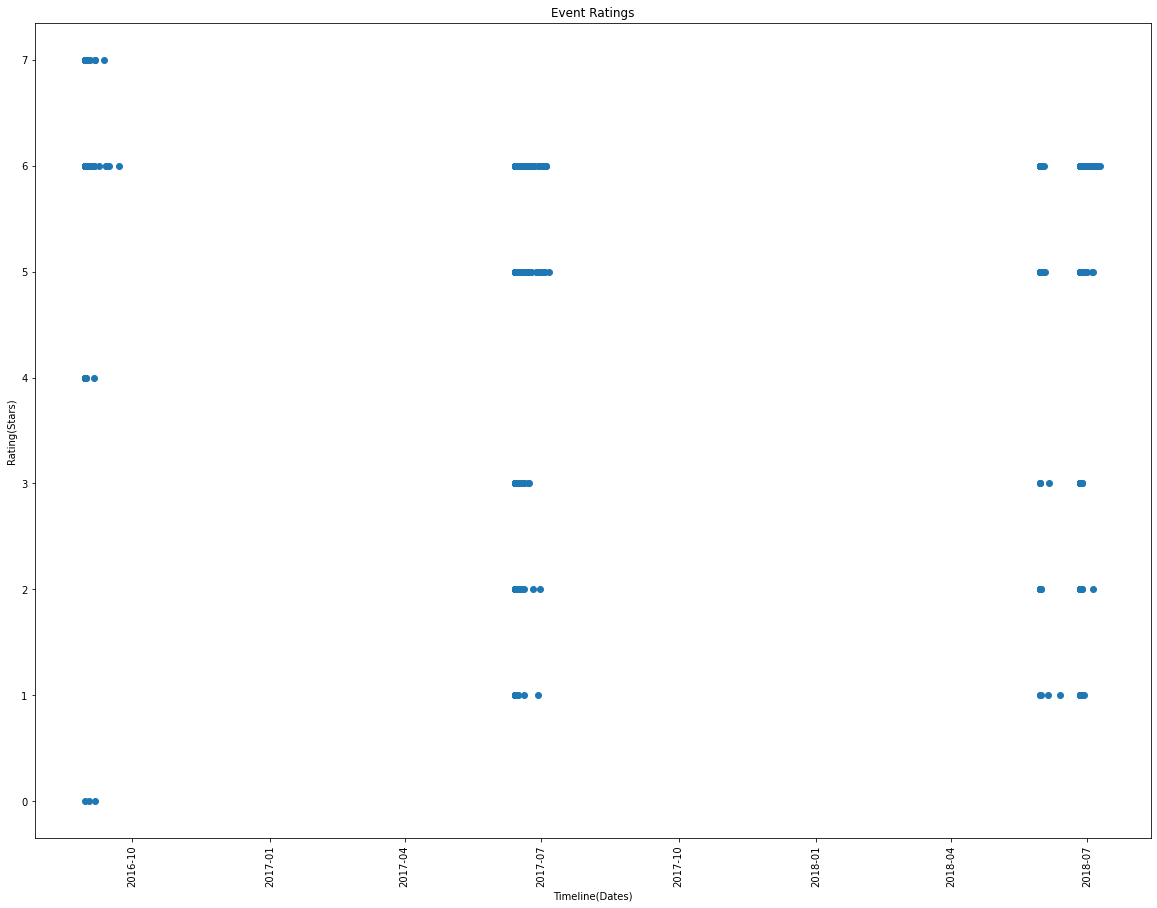

In [11]:
df2 = df2.sort_values('EndDate',ascending=True)
df2['Satisfaction_Level'] = df2['Satisfaction_Level'].replace(to_replace=d)
fig = plt.figure(figsize = (20,15))
# ax = fig.gca()
plt.scatter(df2['EndDate'],df2['Satisfaction_Level'])
plt.title('Event Ratings')
plt.xticks(rotation='vertical')
plt.xlabel('Timeline(Dates)')
plt.ylabel('Rating(Stars)')
plt.savefig('Ratings.png',bbox_inches ="tight")

In [19]:
s1 = df2.groupby('Program').count()['ResponseID']


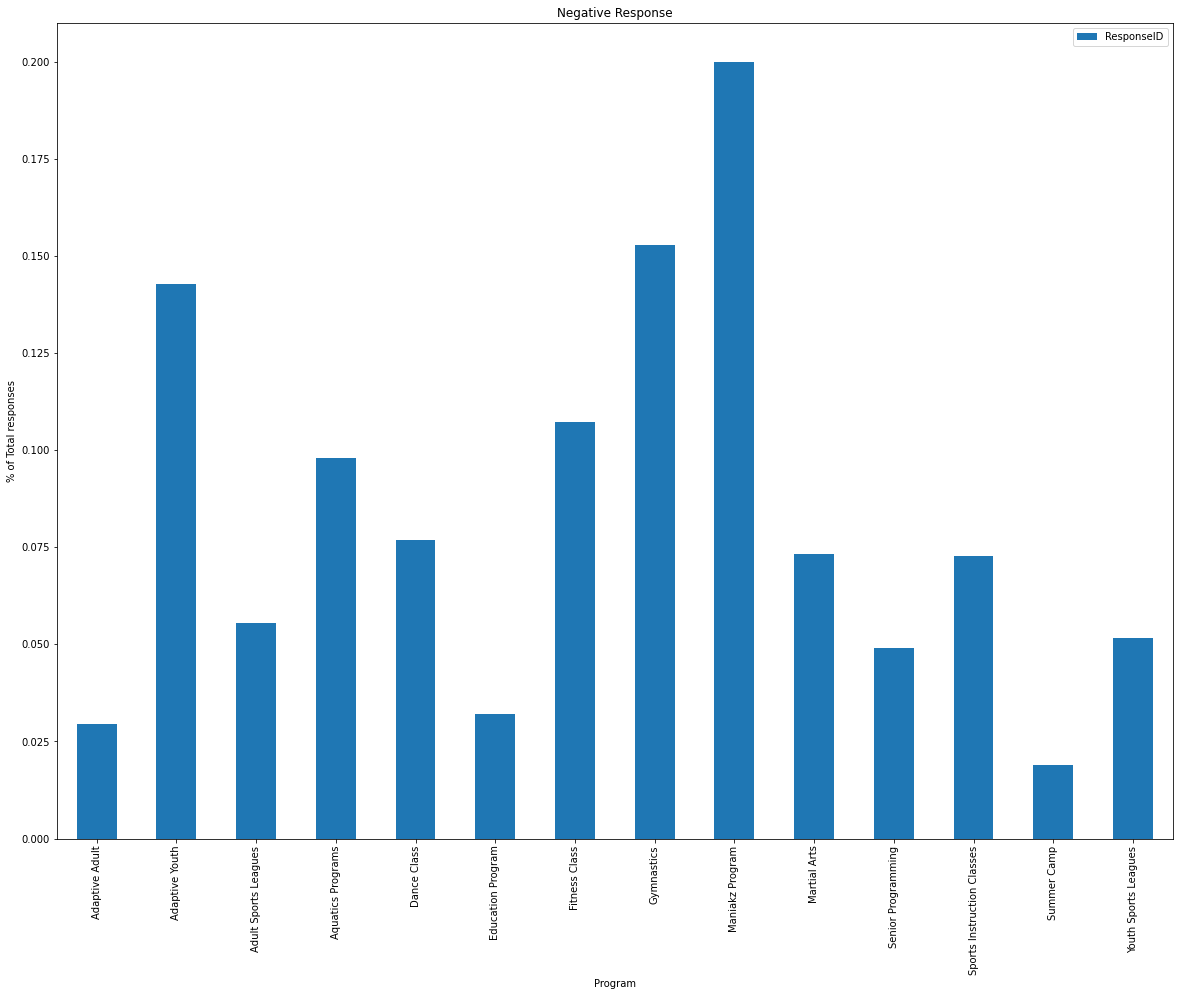

In [23]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df3=df2[(df2['Satisfaction_Level']<=3) & (df2['FY']=='FY 2017')].groupby('Program').count()[['ResponseID']]
df3['ResponseID']=df3['ResponseID'].div(s1)
df3.plot(title='Negative Response',kind='bar',ax=ax)
plt.ylabel('% of Total responses')
plt.savefig('%NegRes.png',bbox_inches ="tight")

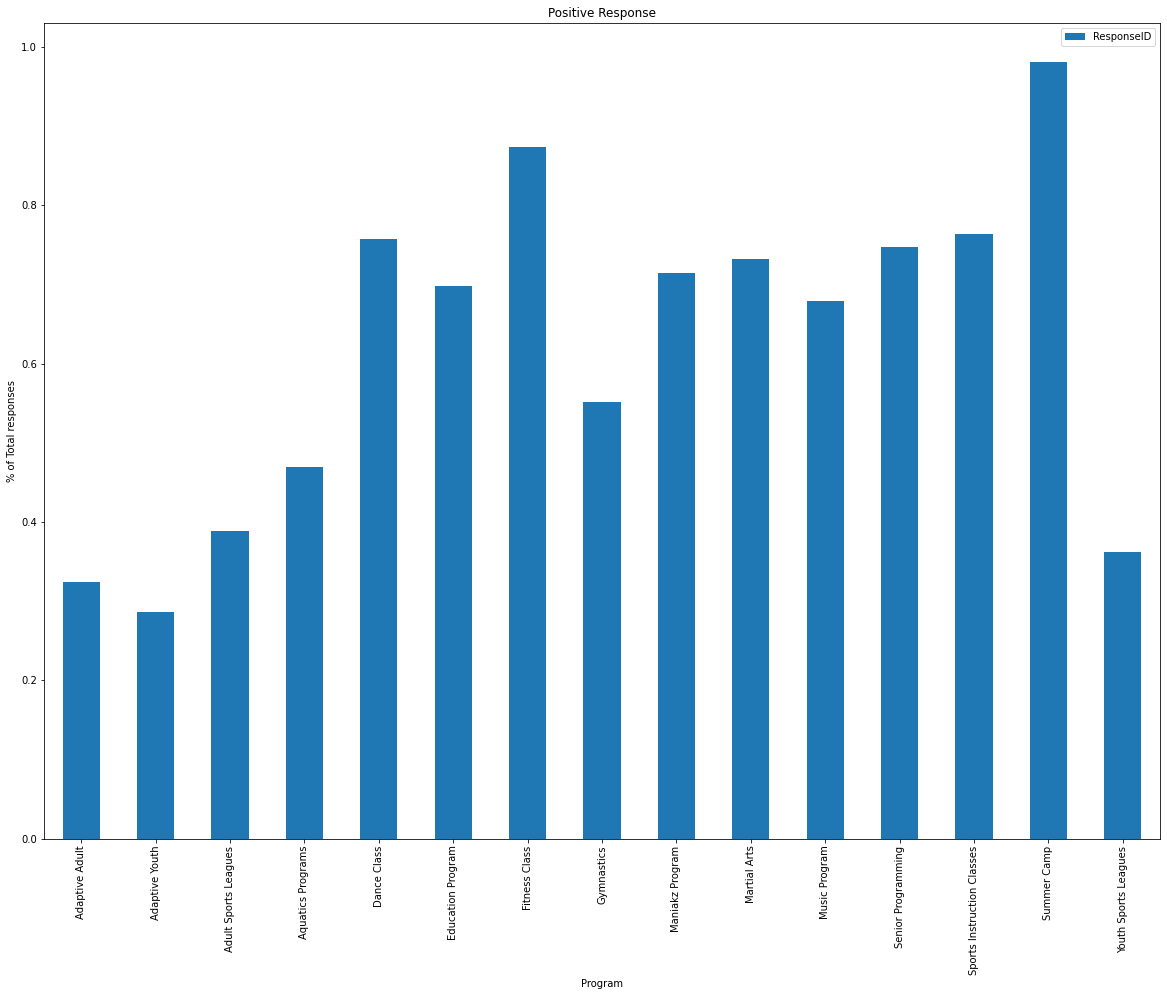

In [26]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df3=df2[(df2['Satisfaction_Level']>3) & (df2['FY']=='FY 2017')].groupby('Program').count()[['ResponseID']]
df3['ResponseID']=df3['ResponseID'].div(s1)
df3.plot(title='Positive Response',kind='bar',ax=ax)
plt.ylabel('% of Total responses')
plt.savefig('%PosRes.png',bbox_inches ="tight")

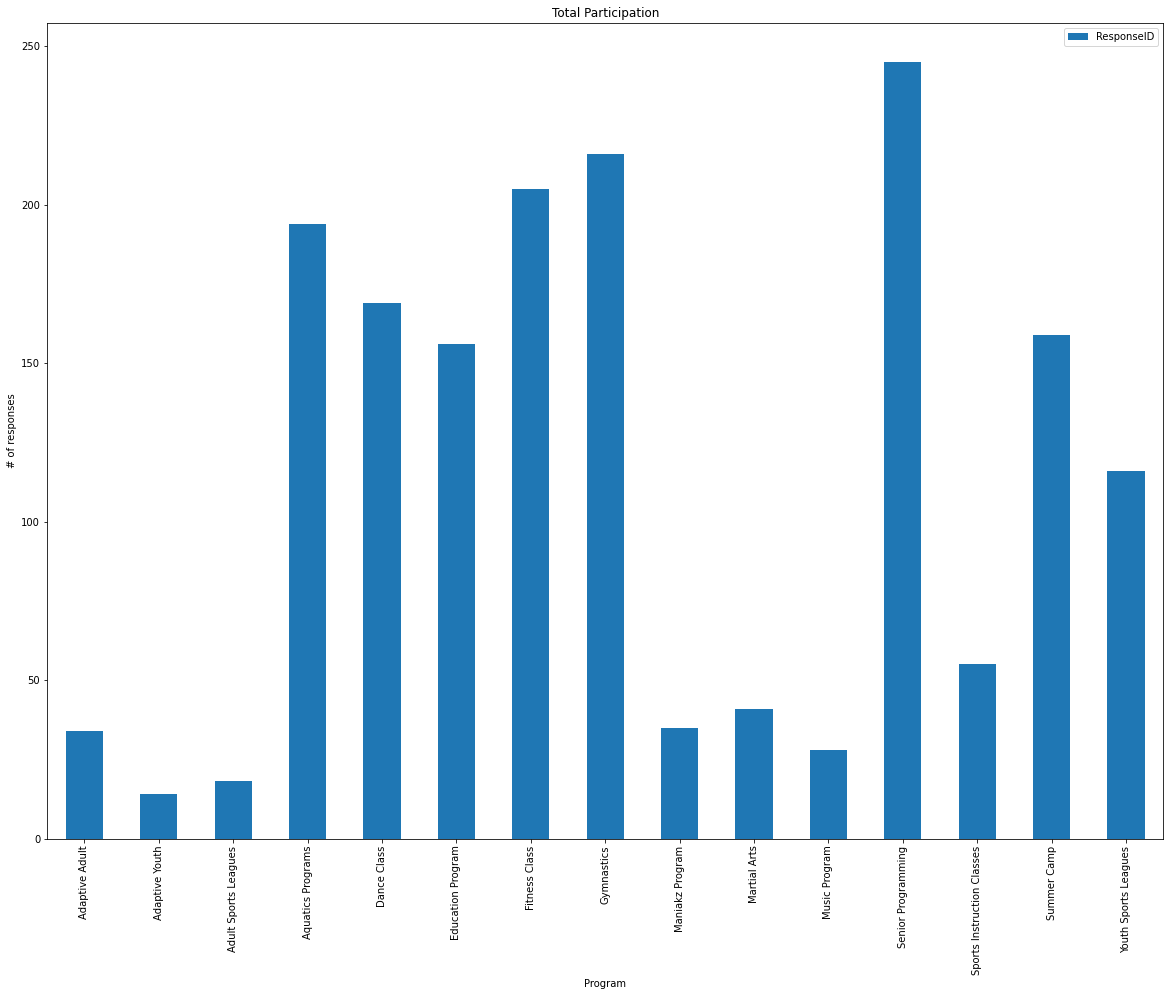

In [25]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df2.groupby('Program').count()[['ResponseID']].plot(title='Total Participation',kind='bar',ax=ax)
plt.ylabel('# of responses')
plt.savefig('Total Participation.png',bbox_inches ="tight")